In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



For the final project the data collection will not be collected on the web. Instead, we will collect our own data for the project purposes.



***Data Collection***



In [3]:
data = pd.read_csv("data/poll_response.csv")
data = data.drop_duplicates(subset='Username')
display(data)

,Timestamp,Username,"By clicking this button, you are agreed and volunteered to give the required information to our research. Researchers will keep the poll's fairness and respondents' privacy and only utilize this source towards this research with no other commercial goals.",To which gender identity do you most identify?,age,What is the average time you spend on YouTube each week?,What is your YouTube watching preference?,This specific form of advertisement (Skippable Ads) makes me feel_______?,Would you skip the advertisement after five seconds?,This specific form of advertisement (Bumper Ads) makes me feel_______?,This specific form of advertisement (Overlay Ads) makes me feel_______?,This specific form of advertisement (Display Ads) makes me feel_______?
0,2020/12/02 8:58:37 PM PST,zsyed@ucsd.edu,I have read and agree / agreed with the terms ...,Male,18,3-6h,Directly watch a random vedio that showed on y...,Somewhat comfortable,Yes,Somewhat annoying,Somewhat annoying,Somewhat annoying
1,2020/12/02 9:08:45 PM PST,vnle@ucsd.edu,I have read and agree / agreed with the terms ...,non-binary,18,6-9h,Directly watch a random vedio that showed on y...,Somewhat comfortable,Yes,Very annoying,Neutral,Very comfortable
2,2020/12/02 9:14:02 PM PST,NA@na.com,I have read and agree / agreed with the terms ...,Male,19,0-3h,Directly search the vedio you are interested in.,Somewhat annoying,Yes,Very annoying,Neutral,Neutral
3,2020/12/02 9:19:40 PM PST,winfred547@outlook.com,I have read and agree / agreed with the terms ...,Male,18,0-3h,Directly watch a random vedio that showed on y...,Somewhat annoying,Yes,Very annoying,Somewhat annoying,Neutral
4,2020/12/02 9:21:56 PM PST,y1ren@ucsd.edu,I have read and agree / agreed with the terms ...,Male,19,3-6h,Directly search the vedio you are interested in.,Somewhat comfortable,Yes,Somewhat annoying,Somewhat annoying,Somewhat comfortable
...,...,...,...,...,...,...,...,...,...,...,...,...
220,2020/12/10 10:38:46 PM PST,jylim@ucsd.edu,I have read and agree / agreed with the terms ...,Male,21,more than 9h,Directly watch a random video that showed on y...,Somewhat annoying,Yes,Somewhat annoying,Neutral,Somewhat annoying
221,2020/12/11 3:36:14 AM PST,tonyshowtime35@yahoo.com.tw,I have read and agree / agreed with the terms ...,Male,22,3-6h,Directly search the video you are interested in.,Somewhat annoying,Yes,Somewhat annoying,Somewhat annoying,Somewhat annoying
222,2020/12/12 4:21:56 PM PST,ccl006@ucsd.edu,I have read and agree / agreed with the terms ...,Female,19,0-3h,Directly search the video you are interested in.,Very comfortable,Yes,Very annoying,Somewhat annoying,Neutral
223,2020/12/12 5:36:01 PM PST,jiw085@ucsd.edu,I have read and agree / agreed with the terms ...,Female,21,0-3h,Directly search the video you are interested in.,Very comfortable,Yes,Somewhat annoying,Very annoying,Very annoying




***Data Wrangling and Tidying***

In [4]:
new_data = data.rename(columns={
    "TimeStamp":"time",
    "By clicking this button, you are agreed and volunteered to give the required information to our research. Researchers will keep the poll's fairness and respondents' privacy and only utilize this source towards this research with no other commercial goals.":"agreement",
    "To which gender identity do you most identify?":"gender",
    "What is your age?":"age",
    "This specific form of advertisement (Skippable Ads) makes me feel_______?":"skippable",
    "Would you skip the advertisement after five seconds?":"skip?",
    "This specific form of advertisement (Bumper Ads) makes me feel_______?":"bumper",
    "This specific form of advertisement (Overlay Ads) makes me feel_______?":"overlay",
    "This specific form of advertisement (Display Ads) makes me feel_______?":"display",
    "What is the average time you spend on YouTube each week?":"time_spend",
    "What is your YouTube watching preference?":"preference"
})
new_data= new_data.replace(
    {'Very comfortable':5,
    "Somewhat comfortable":4,
    "Neutral":3,
    "Somewhat annoying":2,
    "Very annoying":1,
    "Directly search the vedio you are interested in.":"search",
    "Directly search the video you are interested in.":"search",
    "Directly watch a random vedio that showed on your home screen that is recommanded by YouTube.":"recommended",
    "Directly watch a random video that showed on your home screen that is recommanded by YouTube.":"recommended",
    "Directly watch a random video that showed on your home screen that is recommended by YouTube.":"recommended"
     })
new_data= new_data.drop(columns={"Timestamp","Username","agreement"})
new_data= new_data[(new_data.get('age')>=18) &(new_data.get('age')<=25)].reset_index()
display(new_data)

,index,gender,age,time_spend,preference,skippable,skip?,bumper,overlay,display
0,0,Male,18,3-6h,recommended,4,Yes,2,2,2
1,1,non-binary,18,6-9h,recommended,4,Yes,1,3,5
2,2,Male,19,0-3h,search,2,Yes,1,3,3
3,3,Male,18,0-3h,recommended,2,Yes,1,2,3
4,4,Male,19,3-6h,search,4,Yes,2,2,4
...,...,...,...,...,...,...,...,...,...,...
205,220,Male,21,more than 9h,recommended,2,Yes,2,3,2
206,221,Male,22,3-6h,search,2,Yes,2,2,2
207,222,Female,19,0-3h,search,5,Yes,1,2,3
208,223,Female,21,0-3h,search,5,Yes,2,1,1




***Exploratory Analysis***



In [5]:
eligible_respondent= new_data.shape[0]
age_tbl= np.round(new_data.groupby('age').count().get(['gender']).rename(columns={'gender':'Percentage'}).sort_values(by="Percentage",ascending = True)/eligible_respondent,3)
time_spend_tbl= np.round(new_data.groupby('time_spend').count().get(['gender']).rename(columns={'gender':'Percentage'}).sort_values(by="Percentage",ascending = True)/eligible_respondent,3)
preference_tbl= np.round(new_data.groupby('preference').count().get(['gender']).rename(columns={'gender':'Percentage'}).sort_values(by="Percentage",ascending = True)/eligible_respondent,3)
ad_tbl= new_data.get(['skippable','bumper','overlay','display']).mean().to_frame(name='score').reset_index()
ad_tbl= np.round(ad_tbl.assign(advertisement_type= ad_tbl.get('index')).set_index('advertisement_type').drop(columns= 'index').sort_values(by= 'score',ascending=True),2)
print('For this project, our samples is ',eligible_respondent)

display(age_tbl,time_spend_tbl,preference_tbl,ad_tbl)

For this project, our samples is  210


,Percentage
age,
25,0.005
24,0.010
23,0.033
22,0.086
20,0.129
21,0.157
19,0.276
18,0.300


,Percentage
time_spend,
more than 9h,0.162
6-9h,0.243
3-6h,0.286
0-3h,0.305


,Percentage
preference,
search,0.424
recommended,0.567


,score
advertisement_type,
bumper,1.60
overlay,2.34
skippable,3.09
display,3.21


***Exploratory Data Visualization***

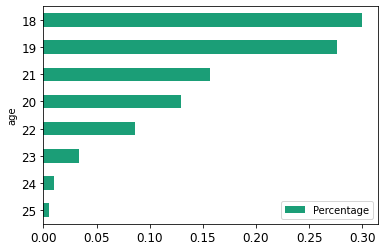

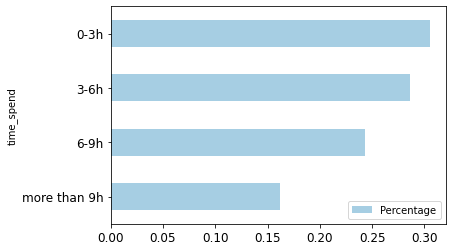

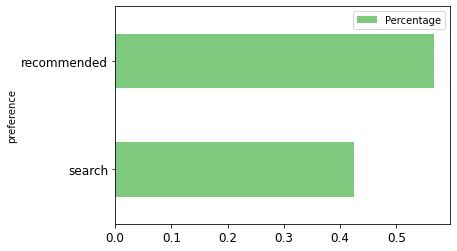

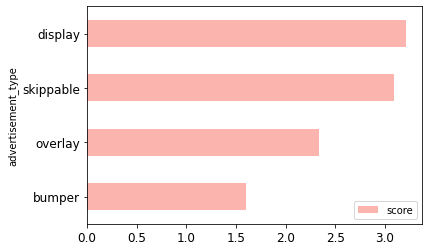

In [6]:
age_graph= age_tbl.plot(kind='barh',colormap= 'Dark2',fontsize= 12)
time_spend_graph= time_spend_tbl.plot(kind='barh',colormap= 'Paired',fontsize= 12)
preference_graph= preference_tbl.plot(kind='barh',colormap= 'Accent',fontsize= 12)
ad_graph= ad_tbl.plot(kind='barh',colormap= 'Pastel1',fontsize= 12)

A side by side barplot of total counts of ratings for each type of ads.

Text(0, 0.5, 'counts')

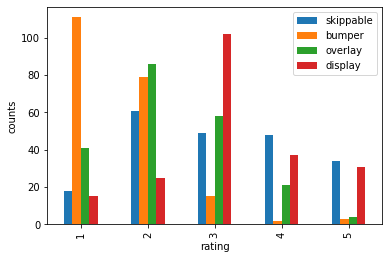

In [7]:
skip = new_data.groupby('skippable').count().get('bumper')
bum = new_data.groupby('bumper').count().get('overlay')
over = new_data.groupby('overlay').count().get('display')
dis = new_data.groupby('display').count().get('bumper')
new_tbl = pd.DataFrame({'skippable' : skip, 'bumper' : bum, 'overlay' : over, 'display' : dis}).rename_axis('rating')
new_tbl.plot(kind='bar')
plt.ylabel('counts')

The historgram for each observed value categories

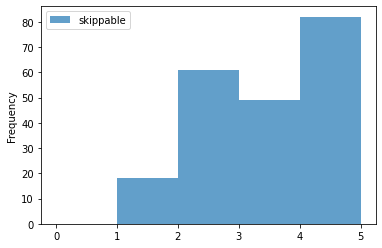

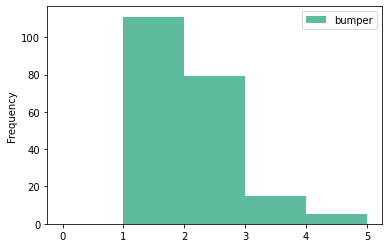

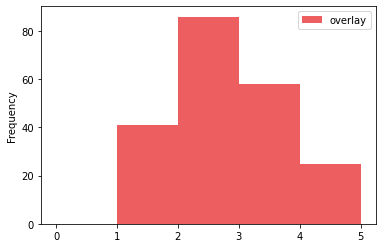

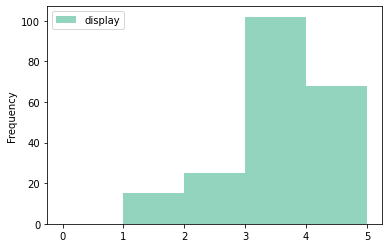

In [8]:
def display_category_hist(tbl):
  bin = np.arange(6)
  skippable_graph= tbl.get(['skippable']).plot(kind= 'hist',bins= bin , alpha= .7)
  bumper_graph= tbl.get(['bumper']).plot(kind= 'hist',bins= bin, alpha= .7,colormap= 'Dark2')
  overlay_graph= tbl.get(['overlay']).plot(kind= 'hist',bins= bin, alpha= .7,colormap= 'Set1')
  display_graph= tbl.get(['display']).plot(kind= 'hist',bins= bin, alpha= .7,colormap= 'Set2')
display_category_hist(new_data)

***Inferential Analysis***

H0: people will feel comfortable watching the advertisement on Youtube (Mean rating above 3 )

HA: people will feel annoying watching the advertisement on Youtube (Mean rating 3 or below )

In [9]:
observed_data= new_data.get(['skippable','bumper','overlay','display'])
display(observed_data)

,skippable,bumper,overlay,display
0,4,2,2,2
1,4,1,3,5
2,2,1,3,3
3,2,1,2,3
4,4,2,2,4
...,...,...,...,...
205,2,2,3,2
206,2,2,2,2
207,5,1,2,3
208,5,2,1,1


In [10]:
def total_sum_mean(temp):
  newtemp= (temp.get('skippable')+temp.get('bumper')+new_data.get('overlay')+new_data.get('display')).sum()/(temp.shape[0]*4)
  return newtemp

In [11]:
observed_stat= total_sum_mean(observed_data)
observed_stat

2.5607142857142855

In [12]:
def bootstrap3(iteration=10000, sample_size= 1000):
  array_of_total= np.array([])
  for i in np.arange(iteration):
    sample= observed_data.sample(sample_size, replace= True)
    statistic=total_sum_mean(sample)
    
    array_of_total= np.append(array_of_total,statistic)
    
  return array_of_total
new_sample = bootstrap3() 

In [13]:
pval= np.count_nonzero(new_sample>=3)/10000
upper_bound= np.percentile(new_sample,97.5)
lower_bound= np.percentile(new_sample,2.5)
print("The 95% confidence interval is [",lower_bound,",",upper_bound,"] with p- value being ",pval)

The 95% confidence interval is [ 2.5205 , 2.60125 ] with p- value being  0.0


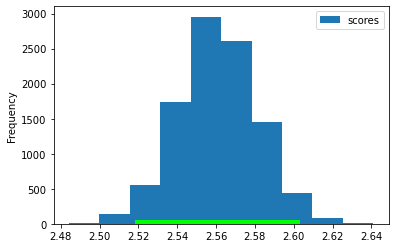

In [14]:
pd.DataFrame().assign(scores= new_sample).plot(kind='hist')
plt.plot([lower_bound,upper_bound],[0,0], color= 'lime',linewidth= 8)

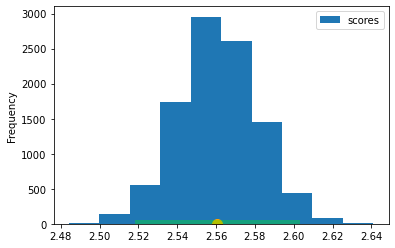

In [15]:
pd.DataFrame().assign(scores= new_sample).plot(kind='hist')
plt.plot([lower_bound,upper_bound],[0,0], color= 'lime',linewidth= 8,alpha= .3)
plt.scatter(observed_stat,0, color='orange', s=100, zorder=2)

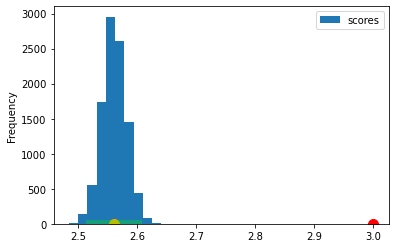

In [16]:
pd.DataFrame().assign(scores= new_sample).plot(kind='hist')
plt.plot([lower_bound,upper_bound],[0,0], color= 'lime',linewidth= 8,alpha= .3)
plt.scatter(observed_stat,0, color='orange', s=100, zorder=2)
plt.scatter(3,0, color='red', s=100, zorder=2)